In [1]:
import pandas as pd
import numpy as np
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import prelim_process_df
from datetime import timedelta
from tqdm.notebook import tqdm
import pickle

In [2]:
def save_list(d,file_name):
    with open(file_name,"wb") as fp:
        pickle.dump(d,fp)
        
        
def load_list(file_name):
    with open(file_name,"rb") as fp:
        b = pickle.load(fp)
    return(b)  

In [3]:
data_path = '/home/jwelliav/Documents/Crypto/data/Binance/'

path_avax = data_path + 'AVAX_USDT.csv'

path_eth = data_path + 'ETH_USDT.csv'

path_btc = data_path + 'BTC_USDT.csv'

path_luna = data_path + 'LUNA_USDT.csv'

path_sol = data_path + 'SOL_USDT.csv'

In [4]:
df_avax = prelim_process_df.read_process_df(path_avax,'avax')

df_eth = prelim_process_df.read_process_df(path_eth,'eth')

df_btc = prelim_process_df.read_process_df(path_btc,'btc')

df_luna = prelim_process_df.read_process_df(path_luna,'luna')

df_sol = prelim_process_df.read_process_df(path_sol,'sol')

In [5]:
 df_avax.tail(100)

,open_avax,high_avax,low_avax,close_avax,volume_avax,returns_avax,log_returns_avax,vol_usdt_K_avax
datetime,,,,,,,,
2022-02-24 10:18:00,73.42,73.51,73.28,73.31,3989.40,-0.002042,-0.002044,292.682331
2022-02-24 10:19:00,73.32,73.45,73.32,73.37,2912.04,0.000818,0.000818,213.583574
2022-02-24 10:20:00,73.37,73.46,73.32,73.45,1861.34,0.001090,0.001090,136.640969
2022-02-24 10:21:00,73.46,73.46,73.25,73.30,1973.18,-0.002042,-0.002044,144.791948
2022-02-24 10:22:00,73.26,73.36,73.21,73.35,3548.68,0.000682,0.000682,260.135987
...,...,...,...,...,...,...,...,...
2022-02-24 11:53:00,73.58,73.58,73.23,73.25,3375.96,-0.004350,-0.004359,247.846103
2022-02-24 11:54:00,73.27,73.46,73.25,73.32,2462.53,0.000956,0.000955,180.491136
2022-02-24 11:55:00,73.32,73.51,72.99,73.05,9885.66,-0.003682,-0.003689,723.482027


In [6]:
"""

resample the data and also delete the first and last entries incase they cause us issues. 

"""

df_avax_d = prelim_process_df.resample(df_avax,'1D')[1:-1]

In [7]:
df_avax_h = prelim_process_df.resample(df_avax,'1H')[1:-1]

In [13]:
tmp = {}



In [14]:
d = timedelta(days = 3456)

In [15]:
a = df_avax_d.index[-1]
b = df_avax_d.index[-1] - d 

In [16]:
b

Timestamp('2012-09-07 00:00:00', freq='D')

In [17]:
np.median(df_avax.loc[b:a]['close_avax'].values)

28.425849999999997

(array([1.55966e+05, 8.01500e+03, 3.00100e+04, 7.47600e+04, 2.69160e+04,
        2.50780e+04, 8.13200e+03, 1.38410e+04, 3.18710e+04, 3.25820e+04,
        2.52010e+04, 2.21610e+04, 1.62080e+04, 8.65200e+03, 8.81500e+03,
        1.19600e+04, 7.89100e+03, 5.47800e+03, 1.17470e+04, 8.54700e+03,
        1.46220e+04, 2.06190e+04, 1.70560e+04, 1.30170e+04, 7.05500e+03,
        6.38300e+03, 8.09000e+03, 7.63300e+03, 1.48940e+04, 1.29810e+04,
        1.67690e+04, 1.05660e+04, 5.73000e+03, 2.40000e+03, 3.30600e+03,
        6.29600e+03, 7.71200e+03, 6.18100e+03, 6.29400e+03, 7.25200e+03,
        5.36200e+03, 3.70600e+03, 2.58700e+03, 1.18300e+03, 8.66000e+02,
        1.08900e+03, 1.02300e+03, 3.40000e+02, 1.53000e+02, 9.00000e+01]),
 array([  2.7505 ,   5.61809,   8.48568,  11.35327,  14.22086,  17.08845,
         19.95604,  22.82363,  25.69122,  28.55881,  31.4264 ,  34.29399,
         37.16158,  40.02917,  42.89676,  45.76435,  48.63194,  51.49953,
         54.36712,  57.23471,  60.1023 ,  62.9

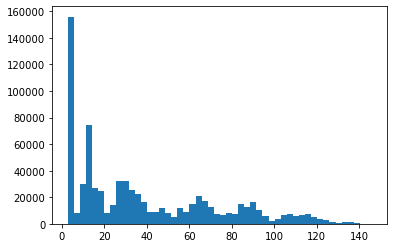

In [18]:
plt.hist(df_avax.loc[b:a]['close_avax'].values, bins = 50)

In [19]:
df_avax_d.index[235]

Timestamp('2021-05-16 00:00:00', freq='D')

In [20]:
s = df_avax_d.index[235]

In [21]:
s

Timestamp('2021-05-16 00:00:00', freq='D')

### fluke bucket strat

In [115]:
def bucket_strat_decision(df,s,price_col = 'close',timedelta_days = 30,comfort_perc = 0.05):
    """
    df - dataframe with minute data
    s : trade date + time
    """
    delta = timedelta(days = timedelta_days)
    a = s - timedelta(days = 1)
    b = a - delta  
    med = np.median(df.loc[b:a][price_col].values)
    
    #daily_prices = df.loc[a:s][price_col].rolling(30).median().dropna()
    #
    #daily_decisions = {}
    #
    #for x in daily_prices():
    #    if x > 1.05 * med:
    #        daily_decisions[x] >
        
    if df.loc[s][price_col] > (1 + comfort_perc) * med:
        return(2)
    elif df.loc[s][price_col] < (1 - comfort_perc) * med:
        return(0)
    else:
        return(1)
    
    

In [116]:
def back_test_bucket_strat(df,start_datetime,price_col = 'close',timedelta_days = 30,trade_time = (12,0,0),comfort_perc = 0.05, p_in = [100,100]):
    p = p_in.copy()
    print(p)
    portfolio_value_through_time = {}
    portfolio_through_time = {}
    decision_dict = {}
    df_d = prelim_process_df.resample(df,'1D')[1:-1]
    delta = timedelta(days = timedelta_days)
    for s in (df.index):
        if (s.hour,s.minute,s.second) == trade_time:
            decision = bucket_strat_decision(df,s,price_col,timedelta_days,comfort_perc)
            if decision == 0:
                """ buy at this price """
                budget = 0.05*p[0]
                amt = budget/(df.loc[s][price_col])
                p[1] = p[1] + amt
                p[0] = 0.95*p[0]
                
            if decision == 1:
                """ """
                sell_amount = .05*p[1]
                usd_sale = sell_amount*(df.loc[s][price_col])
                p[0] = p[0] + usd_sale
                p[1] = 0.95*p[1] 
                       
            decision_dict[s] = decision
        
            portfolio_value_through_time[s] = p[0] + df.loc[s][price_col]*p[1]
            portfolio_through_time[s] = (p[0],p[1])    
       
    return(p,decision_dict,portfolio_value_through_time,portfolio_through_time)

In [73]:
df_d = prelim_process_df.resample(df_avax,'1D')[1:-1]

str_dt = df_d.index[100]


p_avax,dd, p_t,p_tt = back_test_bucket_strat(df_avax,str_dt,price_col = 'close_avax',timedelta_days = 10,comfort_perc = 0.15)




In [74]:
p_avax

[836.5134673405237, 2.3587021832147226]

<AxesSubplot:>

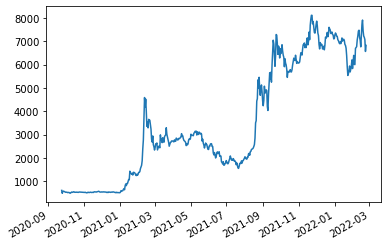

In [51]:
pd.Series(p_t).plot()

In [123]:
def grid_search(df,start_datetime,price_col = 'close',trade_time = (12,0,0), p_in = [100,100]):
    timedelta_vals = [10,20,30,40,50,60,70,80,90]
    comfort_percs = [0.1,0.05,0.01,0.15,0.2]
    grid_results = {}
    for t in tqdm(timedelta_vals):
        for c in tqdm(comfort_percs):
            port_final,decision_dict,p_t,p_tt = back_test_bucket_strat(df,str_dt,price_col = price_col,timedelta_days = t,trade_time = (12,0,0),comfort_perc = c,p_in = p_in)
            grid_results[(t,c)] = (port_final,decision_dict,p_t,p_tt)
            print((t,c),port_final)
    return(grid_results)

In [124]:
df_d = prelim_process_df.resample(df_avax,'1D')[1:-1]

str_dt = df_d.index[100]

grid_results = grid_search(df_avax,str_dt,price_col = 'close_avax')

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[100, 100]
(10, 0.1) [1233.519519340013, 5.718406175285741]
[100, 100]
(10, 0.05) [2697.4368956928565, 36.2657337188998]
[100, 100]
(10, 0.01) [1828.2690240538795, 99.52001748217235]
[100, 100]


KeyboardInterrupt: 

In [119]:
df_d.loc[str_dt]

open_eth            711.000000
high_eth            729.880000
low_eth             695.510000
close_eth           698.820000
volume_eth        97104.714650
vol_usdt_K_eth    69329.562522
Name: 2018-05-21 00:00:00, dtype: float64

In [125]:
df_d = prelim_process_df.resample(df_eth,'1D')[1:-1]

str_dt = df_d.index[100]

price_col = 'close_eth'

p_input = [df_d.loc[str_dt]['close_eth'],1]

grid_results = grid_search(df_eth,str_dt,'close_eth',p_in = p_input)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(10, 0.1) [1264.7539123723175, 0.14387918649414105]
[698.82, 1]
(10, 0.05) [1275.286411665584, 0.5386734432658844]
[698.82, 1]
(10, 0.01) [830.2213095602368, 1.6650154495792417]
[698.82, 1]
(10, 0.15) [1546.3852104123437, 0.06553334113386275]
[698.82, 1]
(10, 0.2) [1553.20976100445, 0.028978047221462785]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(20, 0.1) [1086.9983899715933, 0.24982363003946176]
[698.82, 1]
(20, 0.05) [1029.915070409012, 0.70515703772859]
[698.82, 1]
(20, 0.01) [705.0153511668652, 1.6110960437916795]
[698.82, 1]
(20, 0.15) [1673.5098240986415, 0.1517240899337843]
[698.82, 1]
(20, 0.2) [1790.0272968132585, 0.06451020759345805]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(30, 0.1) [1552.863414034991, 0.22273540073283]
[698.82, 1]
(30, 0.05) [1229.8921051915966, 0.5212332284415846]
[698.82, 1]
(30, 0.01) [540.7598260698768, 1.750799988196967]
[698.82, 1]
(30, 0.15) [1526.9181894515407, 0.11810524599228296]
[698.82, 1]
(30, 0.2) [1789.8074813607786, 0.09107582246038629]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(40, 0.1) [1363.877645418499, 0.3118824492653019]
[698.82, 1]
(40, 0.05) [1330.89783551809, 0.8262248670249128]
[698.82, 1]
(40, 0.01) [478.4122531419997, 2.071171570624631]
[698.82, 1]
(40, 0.15) [1526.9756476052814, 0.17750118727943157]
[698.82, 1]
(40, 0.2) [1841.1766442054493, 0.12104212053072026]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(50, 0.1) [1075.9819377071976, 0.35591210247197363]
[698.82, 1]
(50, 0.05) [706.1754398141003, 0.7606109087008305]
[698.82, 1]
(50, 0.01) [466.74121146118546, 2.003597675983839]
[698.82, 1]
(50, 0.15) [1236.8260416103442, 0.21692963981422733]
[698.82, 1]
(50, 0.2) [1746.4774446629958, 0.12882961400492396]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(60, 0.1) [839.7493701133519, 0.4986882724673056]
[698.82, 1]
(60, 0.05) [474.8448151953147, 1.0879915085164662]
[698.82, 1]
(60, 0.01) [9.014027715839878, 1.7824671997659545]
[698.82, 1]
(60, 0.15) [1137.3180789914693, 0.2704305597170483]
[698.82, 1]
(60, 0.2) [1772.2651535557025, 0.20121709546912703]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(70, 0.1) [368.44066371508694, 0.5939959372964239]
[698.82, 1]
(70, 0.05) [421.8366598507107, 1.2109623194557775]
[698.82, 1]
(70, 0.01) [38.1439187498462, 2.1294645640641487]
[698.82, 1]
(70, 0.15) [958.5732573479191, 0.3952335578248426]
[698.82, 1]
(70, 0.2) [1968.409490537214, 0.25617657661777155]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(80, 0.1) [229.21107102848634, 0.4449506909395896]
[698.82, 1]
(80, 0.05) [138.54124117023207, 1.1368059659606238]
[698.82, 1]
(80, 0.01) [26.054103986810656, 1.9098573088918818]
[698.82, 1]
(80, 0.15) [373.10137107885265, 0.5268167508667534]
[698.82, 1]
(80, 0.2) [1392.1470521632393, 0.41064007482444775]


  0%|          | 0/5 [00:00<?, ?it/s]

[698.82, 1]
(90, 0.1) [109.64337023793423, 0.45192146204725214]
[698.82, 1]
(90, 0.05) [121.61269699161008, 0.893883669444167]
[698.82, 1]
(90, 0.01) [68.99075412746971, 1.9062827339861108]
[698.82, 1]
(90, 0.15) [139.02039988934962, 0.5089766413019229]
[698.82, 1]
(90, 0.2) [620.2814374394083, 0.5706422049856553]


In [ ]:
for k in grid_results.keys():
    print(k,grid_results[k][0])

In [30]:
1.5720551025814022e+21

1.5720551025814022e+21

<AxesSubplot:>

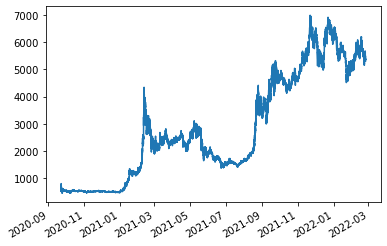

In [29]:
pd.Series(grid_results[(10,0.05)][2]).plot()

In [50]:
p,dd,p_t = grid_results[(90,0.01)]

<AxesSubplot:>

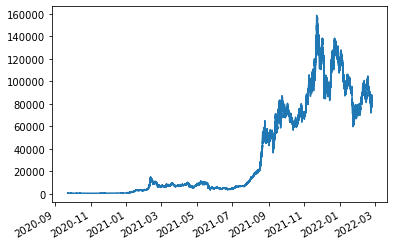

In [51]:
pd.Series(p_t).plot()

In [53]:
pd.Series(dd.values()).value_counts()

2    292
0    214
1     10
dtype: int64

In [55]:
df_btc_D = prelim_process_df.resample(df_btc,'1D')[1:-1]

str_dt_btc = df_btc_D.index[100]


p,decision_dict,p_t = back_test_bucket_strat(df_btc,str_dt,price_col = 'close_btc',timedelta_days = 90,trade_time = (12,0,0),comfort_perc = 0.01)




  0%|          | 0/2119146 [00:00<?, ?it/s]

In [56]:
p

[33569.8183553674, 767.4093928063263]

In [57]:
pd.Series(decision_dict.values()).value_counts()

2    769
0    611
1     81
dtype: int64

<AxesSubplot:>

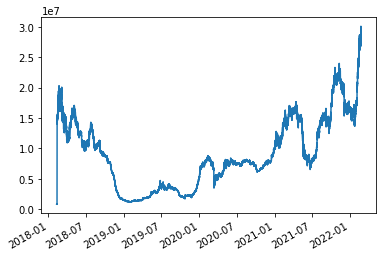

In [60]:
pd.Series(p_t).plot()

In [64]:
df_eth_D = prelim_process_df.resample(df_eth,'1D')[1:-1]

str_dt_eth = df_eth_D.index[100]


p,decision_dict,p_t,p_tt = back_test_bucket_strat(df_eth,str_dt,price_col = 'close_eth',timedelta_days = 90,trade_time = (12,0,0),comfort_perc = 0.01)

  0%|          | 0/2119149 [00:00<?, ?it/s]

In [65]:
p

[77107.46998890788, 1696.9844574994058]

In [ ]:
pd.Series(p_t).plot()

In [70]:
z = p_tt.values()

In [82]:
min([x[0] for x in set(z)])

10.792756251607932

In [ ]:
for x in set(z):
    if z 

In [100]:
def bucket_strat_decision(df,s,price_col = 'close',timedelta_days = 30,comfort_perc = 0.05):
    """
    df - dataframe with minute data
    s : trade date + time
    """
    delta = timedelta(days = timedelta_days)
    a = s - timedelta(days = 1)
    b = a - delta  
    med = np.median(df.loc[b:a][price_col].values)
    
    #daily_prices = df.loc[a:s][price_col].rolling(30).median().dropna()
    #
    #daily_decisions = {}
    #
    #for x in daily_prices():
    #    if x > 1.05 * med:
    #        daily_decisions[x] >
        
    if df.loc[s][price_col] > (1 + comfort_perc) * med:
        return('sell')
    elif df.loc[s][price_col] < (1-comfort_perc) * med:
        return('buy')
    else:
        return('do_nothing')
    
    

In [15]:
e = df_avax.index[0]
df_avax.loc[e]['close_avax']

4.2775

In [19]:
s1 = s + timedelta(days = 1)

df_price = df_avax.loc[s:s1]['close_avax'].rolling(30).median().dropna()



In [101]:
def back_test_bucket_strat(df,start_datetime,price_col = 'close',timedelta_days = 30,trade_time = (12,0,0),comfort_perc = 0.05,p_in = [100,100]):
    p = p_in.copy()
    portfolio_value_through_time = {}
    decision_dict = {}
    portfolio_through_time = {}
    df_d = prelim_process_df.resample(df,'1D')[1:-1]
    delta = timedelta(days = timedelta_days)
    for s in (df.index):
        if (s.hour,s.minute,s.second) == trade_time:
            decision = bucket_strat_decision(df,s,price_col,timedelta_days,comfort_perc)
            if decision == 'buy':
                """ buy at this price """
                budget = 0.05*p[0]
                avax_amt = budget/(df.loc[s][price_col])
                p[1] = p[1] + avax_amt
                p[0] = 0.95*p[0]
                
            if decision == 'sell':
                """ sell at this price """
                sell_amount = .05*p[1]
                usd_sale = sell_amount*(df.loc[s][price_col])
                p[0] = p[0] + usd_sale
                p[1] = 0.95*p[1] 
                
            decision_dict[s] = decision
            
            portfolio_value_through_time[s] = p[0] + df.loc[s][price_col]*p[1]
            
            portfolio_through_time[s] = (p[0],p[1])    
       
    return(p,decision_dict,portfolio_value_through_time,portfolio_through_time)
               
    

In [181]:
    
#    
#    

In [102]:
df_d = prelim_process_df.resample(df_avax,'1D')[1:-1]

str_dt = df_d.index[100]

In [103]:
p_avax,decision_dict,p_t,p_tt = back_test_bucket_strat(df_avax,str_dt,price_col = 'close_avax',timedelta_days = 30,trade_time = (12,0,0),comfort_perc = 0.35)

In [104]:
p_avax

[2543.6594874156735, 6.100789136509109]

<AxesSubplot:>

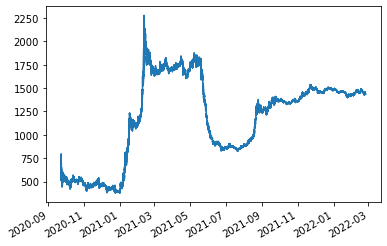

In [188]:
pd.Series(p_t).plot()

In [189]:
p_avax

[1276.445116332838, 2.1900811999039913]

In [190]:
pd.Series(decision_dict.values()).value_counts()

do_nothing    409
sell           92
buy            15
dtype: int64

do_nothing    255
sell          185
buy            76
dtype: int64

In [109]:
def grid_search(df,start_datetime,price_col = 'close',trade_time = (12,0,0)):
    timedelta_vals = [10,20,30,40,50,60,70,80,90]
    comfort_percs = [0.01,0.05,0.1,0.15,0.2]
    grid_results = {}
    for t in tqdm(timedelta_vals):
        for c in tqdm(comfort_percs):
            p,decision_dict,p_t,p_tt = back_test_bucket_strat(df,str_dt,price_col = 'close_avax',timedelta_days = t,trade_time = (12,0,0),comfort_perc = c,p_in = [300,100])
            grid_results[(t,c)] = (p,decision_dict,p_t)
            print((t,c),p)
    return(grid_results)
    

In [110]:
df_d = prelim_process_df.resample(df_avax,'1D')[1:-1]

str_dt = df_d.index[100]


grid_results_avax = grid_search(df_avax,str_dt,price_col = 'close_avax',trade_time = (12,0,0))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(10, 0.01) [2235.486220589644, 26.114698542493826]
(10, 0.05) [2319.1426688471233, 29.15543084747186]
(10, 0.1) [2557.9862747855127, 23.281757841062525]
(10, 0.15) [2859.225698939955, 27.99782109318955]
(10, 0.2) [2387.652850568048, 20.081440145921587]


  0%|          | 0/5 [00:00<?, ?it/s]

(20, 0.01) [3023.686177819647, 30.100903467742416]
(20, 0.05) [2921.6168827915303, 28.45694739721189]
(20, 0.1) [3148.245120179722, 28.175660018128614]
(20, 0.15) [2439.558586800546, 28.016855499362862]
(20, 0.2) [2619.2321438918534, 24.05715206176929]


  0%|          | 0/5 [00:00<?, ?it/s]

(30, 0.01) [3168.8415005033307, 31.91137342896614]
(30, 0.05) [3107.2261764268687, 32.617275824010946]
(30, 0.1) [2641.94801494385, 40.614218369888825]
(30, 0.15) [1837.9561824870166, 34.01152751818497]
(30, 0.2) [2161.125828543642, 25.333702197688307]


  0%|          | 0/5 [00:00<?, ?it/s]

(40, 0.01) [2124.959891666841, 39.56598739009913]
(40, 0.05) [1638.9384888753696, 45.495391432256596]
(40, 0.1) [1271.7545972551716, 42.413989044262486]
(40, 0.15) [1622.9376525322016, 41.06934615589048]
(40, 0.2) [1788.407645530206, 29.47385466949453]


  0%|          | 0/5 [00:00<?, ?it/s]

(50, 0.01) [1272.677094346316, 47.13094297697067]
(50, 0.05) [1235.3164419786003, 47.176159398409716]
(50, 0.1) [1244.5953258507363, 50.202078449327225]
(50, 0.15) [1526.4234049507688, 46.123687093149044]
(50, 0.2) [1770.1009174788787, 30.84820596356986]


  0%|          | 0/5 [00:00<?, ?it/s]

(60, 0.01) [779.2070163304437, 45.599295361315335]
(60, 0.05) [982.4075451078392, 48.925407776071154]
(60, 0.1) [1079.074018101471, 53.50480823671492]
(60, 0.15) [1441.672854683657, 49.96616893085]
(60, 0.2) [1970.558434014428, 34.26620373703467]


  0%|          | 0/5 [00:00<?, ?it/s]

(70, 0.01) [799.6960280711277, 47.26620652054882]
(70, 0.05) [950.9646073108478, 49.10518053404962]
(70, 0.1) [1207.893449156707, 55.10494738104432]
(70, 0.15) [1615.3721800358524, 50.504641152227165]
(70, 0.2) [1982.2601817211796, 38.09560665547678]


  0%|          | 0/5 [00:00<?, ?it/s]

(80, 0.01) [897.287203853825, 52.73655378056877]
(80, 0.05) [1198.8514476807022, 58.78368308592623]
(80, 0.1) [1529.7631186067124, 59.37807890484909]
(80, 0.15) [1977.9918419384408, 52.17592560813483]
(80, 0.2) [2284.103423146581, 43.7479443620889]


  0%|          | 0/5 [00:00<?, ?it/s]

(90, 0.01) [1068.8708495286364, 60.944680010966]
(90, 0.05) [1291.547176101652, 64.92707847479656]
(90, 0.1) [1756.635687808168, 61.214746913114546]
(90, 0.15) [1932.1712023272262, 54.949002413477245]
(90, 0.2) [2481.970554991526, 43.773525767494235]


In [166]:
save_list(grid_results_avax,"grid_results_avax")

In [169]:
res = [grid_results_avax[k][0] for k in grid_results_avax.keys()]

In [174]:
38*72

2736

In [170]:
res

[[1973.9656942122876, 25.101873386041817],
 [1924.975350420987, 18.713541715814312],
 [1177.5162038474016, 15.258958123388316],
 [1122.5034613288433, 9.83964691296151],
 [2807.5850574917167, 28.25098696632527],
 [2854.156903921951, 26.77814725796997],
 [1839.0895757922854, 27.41037914765607],
 [1249.951272767595, 17.18425329034154],
 [3309.4582219872023, 38.46184590192014],
 [3127.2718841932906, 31.9184997234129],
 [1489.4365989212497, 38.90627680742624],
 [905.4541987138882, 16.129785116393705],
 [1556.774828704276, 54.10974877602252],
 [2621.988938033616, 53.77903025707537],
 [736.0287786078942, 31.428062979983626],
 [837.0362349901835, 16.030768640327583],
 [1066.6912497596736, 46.612401241018446],
 [1352.763996840378, 60.174868209066],
 [747.463473399137, 32.12396969202388],
 [850.1476811655269, 16.708862024846677],
 [855.9535103906545, 63.506128785299296],
 [776.0337454462268, 46.93980752342905],
 [938.6207723516757, 21.317427252692184],
 [979.5385846211825, 14.283113283825267],
 

In [173]:
[pd.Series(grid_results_avax[k][1]).value_counts() for k in grid_results_avax.keys()]

[sell          193
 buy           162
 do_nothing    161
 dtype: int64,
 sell          251
 buy           224
 do_nothing     41
 dtype: int64,
 do_nothing    342
 sell          111
 buy            63
 dtype: int64,
 do_nothing    403
 sell           81
 buy            32
 dtype: int64,
 sell          231
 buy           189
 do_nothing     96
 dtype: int64,
 sell          267
 buy           235
 do_nothing     14
 dtype: int64,
 do_nothing    277
 sell          149
 buy            90
 dtype: int64,
 do_nothing    340
 sell          120
 buy            56
 dtype: int64,
 sell          220
 buy           191
 do_nothing    105
 dtype: int64,
 sell          266
 buy           231
 do_nothing     19
 dtype: int64,
 do_nothing    273
 sell          149
 buy            94
 dtype: int64,
 do_nothing    334
 sell          127
 buy            55
 dtype: int64,
 sell          230
 buy           188
 do_nothing     98
 dtype: int64,
 sell          262
 buy           236
 do_nothing     18
 dtype:

In [122]:
grid_results_btc = grid_search(df_btc,str_dt,price_col = 'close_btc',trade_time = (12,0,0))

3773.4565441843456

In [ ]:
grid_results_eth = grid_search(df_eth,str_dt,price_col = 'close_eth',trade_time = (12,0,0))

In [73]:
df_avax.loc[str_dt]['close_avax']*100 + 100

382.12

In [74]:
(df_avax.iloc[-1]['close_avax']*p[1]) + (p[0])

29485.576426907173

In [64]:
df_avax.iloc[-1]['close_avax']

72.03

Timestamp('2020-10-23 00:00:00', freq='D')

In [86]:
df_avax.loc[s]

open_avax             39.571000
high_avax             39.780000
low_avax              39.549000
close_avax            39.676000
volume_avax         9963.432000
returns_avax           0.002653
log_returns_avax       0.002650
vol_usdt_K_avax      394.786048
Name: 2021-05-16 00:00:00, dtype: float64